In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

In [2]:
data=pd.read_csv('weather (1).csv', index_col='date')
data

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [3]:
data.apply(pd.isnull).sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [4]:
data.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [5]:
data.index

Index(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
       '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
       ...
       '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
       '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', name='date', length=1461)

In [6]:
data.index=pd.to_datetime(data.index)
data.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

In [7]:
data.index.year.value_counts().sort_index()

2012    366
2013    365
2014    365
2015    365
Name: date, dtype: int64

In [8]:
data.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


In [9]:
#data['target']=data.shift(-1)['temp_max']

In [10]:
data

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [11]:
#data=data.ffill()

In [12]:
#data

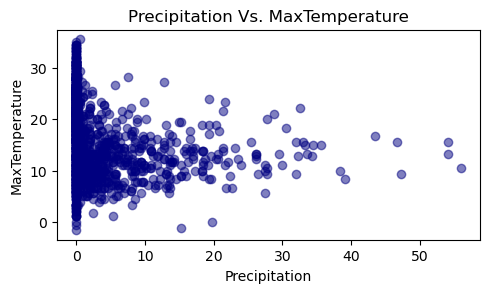

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.scatter(data['precipitation'], data['temp_max'], alpha=0.5, color='navy')
plt.xlabel('Precipitation')
plt.ylabel('MaxTemperature')
plt.title('Precipitation Vs. MaxTemperature')
plt.show()

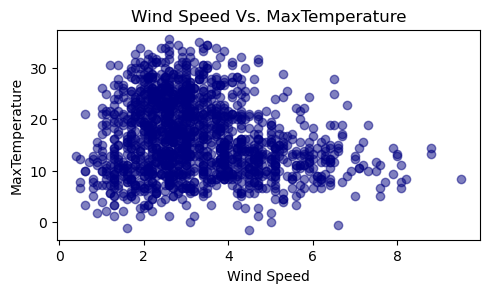

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,2)
plt.scatter(data['wind'], data['temp_max'], alpha=0.5, color='navy')
plt.xlabel('Wind Speed')
plt.ylabel('MaxTemperature')
plt.title('Wind Speed Vs. MaxTemperature')
plt.show()

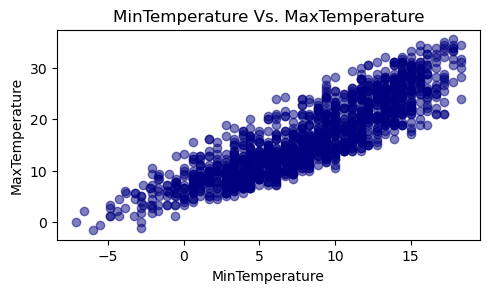

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,2)
plt.scatter(data['temp_min'], data['temp_max'], alpha=0.5, color='navy')
plt.xlabel('MinTemperature')
plt.ylabel('MaxTemperature')
plt.title('MinTemperature Vs. MaxTemperature')
plt.show()

''

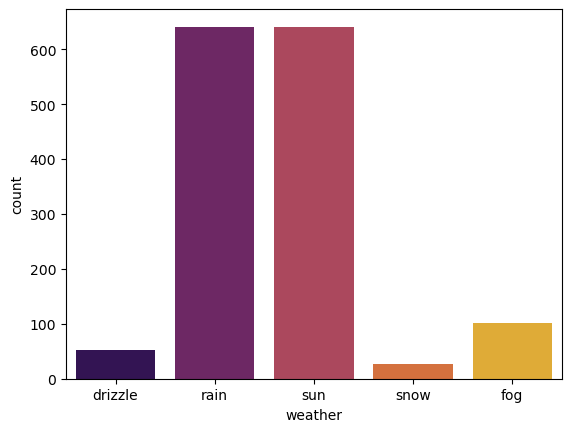

In [16]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot("weather",data=data,palette="inferno")
;

In [17]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


<AxesSubplot:xlabel='wind', ylabel='Count'>

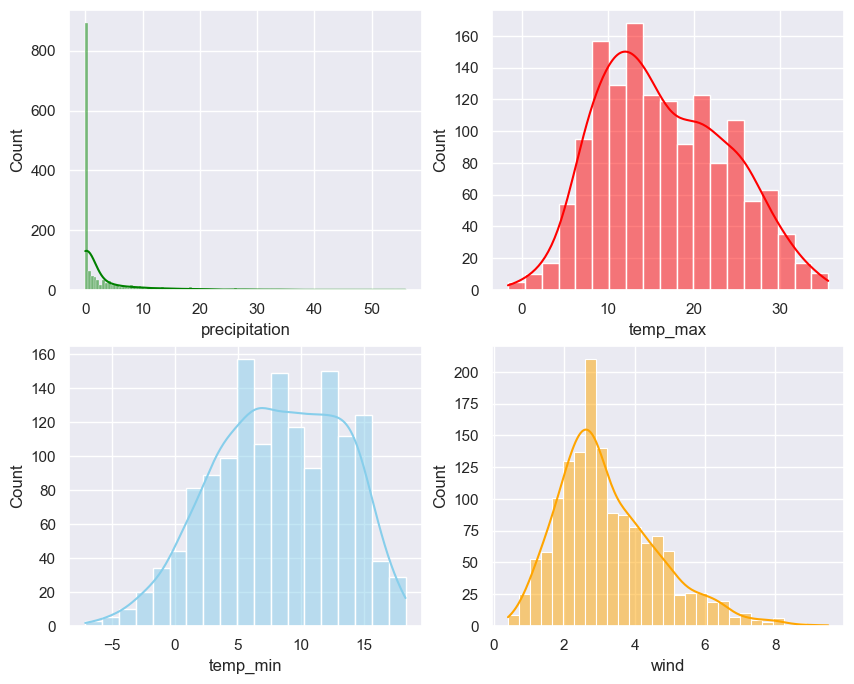

In [18]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

<AxesSubplot:xlabel='wind', ylabel='weather'>

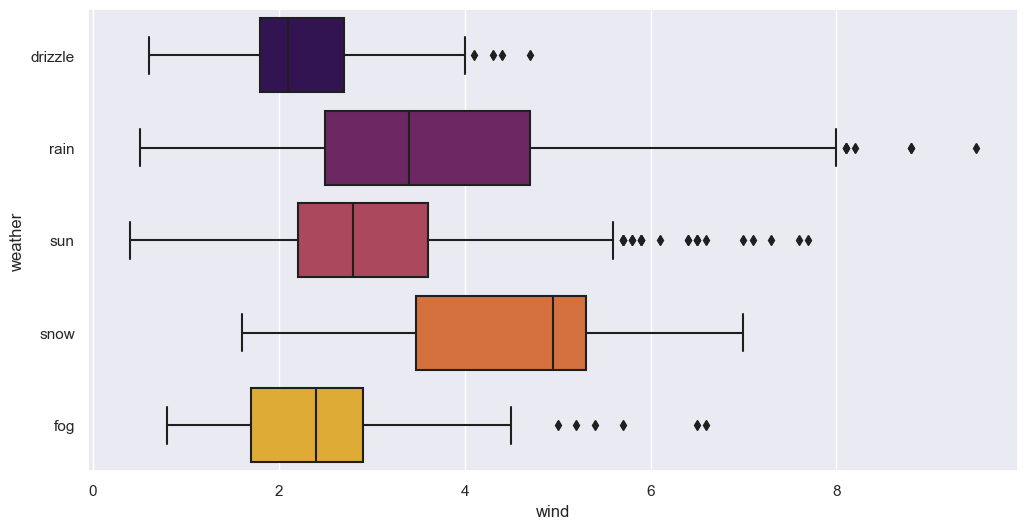

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="inferno")

In [20]:
np.unique(data['weather'])

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [22]:
category_feature=['weather']

In [23]:
one_hot=OneHotEncoder()

In [24]:
transformer=ColumnTransformer([('one hot', one_hot, category_feature)], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot', OneHotEncoder(), ['weather'])])

In [25]:
transformer_data=transformer.fit_transform(data)
transformer_data

array([[ 1. ,  0. ,  0. , ..., 12.8,  5. ,  4.7],
       [ 0. ,  0. ,  1. , ..., 10.6,  2.8,  4.5],
       [ 0. ,  0. ,  1. , ..., 11.7,  7.2,  2.3],
       ...,
       [ 0. ,  1. ,  0. , ...,  7.2,  0.6,  2.6],
       [ 0. ,  0. ,  0. , ...,  5.6, -1. ,  3.4],
       [ 0. ,  0. ,  0. , ...,  5.6, -2.1,  3.5]])

In [26]:
d=pd.DataFrame(transformer_data)
d

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,0.0,0.0,0.0,12.8,5.0,4.7
1,0.0,0.0,1.0,0.0,0.0,10.9,10.6,2.8,4.5
2,0.0,0.0,1.0,0.0,0.0,0.8,11.7,7.2,2.3
3,0.0,0.0,1.0,0.0,0.0,20.3,12.2,5.6,4.7
4,0.0,0.0,1.0,0.0,0.0,1.3,8.9,2.8,6.1
...,...,...,...,...,...,...,...,...,...
1456,0.0,0.0,1.0,0.0,0.0,8.6,4.4,1.7,2.9
1457,0.0,0.0,1.0,0.0,0.0,1.5,5.0,1.7,1.3
1458,0.0,1.0,0.0,0.0,0.0,0.0,7.2,0.6,2.6
1459,0.0,0.0,0.0,0.0,1.0,0.0,5.6,-1.0,3.4


In [27]:
dummies=pd.get_dummies(data, columns=category_feature)
dummies

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0
2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0
2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0
2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0
2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,0,0,1,0,0
2015-12-28,1.5,5.0,1.7,1.3,0,0,1,0,0
2015-12-29,0.0,7.2,0.6,2.6,0,1,0,0,0


In [28]:
dummies.corr()

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
precipitation,1.000000,-0.228555,-0.072684,0.328045,-0.088015,-0.123627,0.467160,0.111354,-0.400534
temp_max,-0.228555,1.000000,0.875687,-0.164857,-0.013538,0.011808,-0.359142,-0.199070,0.411315
temp_min,-0.072684,0.875687,1.000000,-0.074185,-0.043409,-0.013870,-0.113748,-0.216830,0.194997
wind,0.328045,-0.164857,-0.074185,1.000000,-0.117869,-0.144085,0.263738,0.109607,-0.174902
weather_drizzle,-0.088015,-0.013538,-0.043409,-0.117869,1.000000,-0.052872,-0.171537,-0.026115,-0.171299
weather_fog,-0.123627,0.011808,-0.013870,-0.144085,-0.052872,1.000000,-0.240942,-0.036682,-0.240608
weather_rain,0.467160,-0.359142,-0.113748,0.263738,-0.171537,-0.240942,1.000000,-0.119010,-0.780621
weather_snow,0.111354,-0.199070,-0.216830,0.109607,-0.026115,-0.036682,-0.119010,1.000000,-0.118845
weather_sun,-0.400534,0.411315,0.194997,-0.174902,-0.171299,-0.240608,-0.780621,-0.118845,1.000000


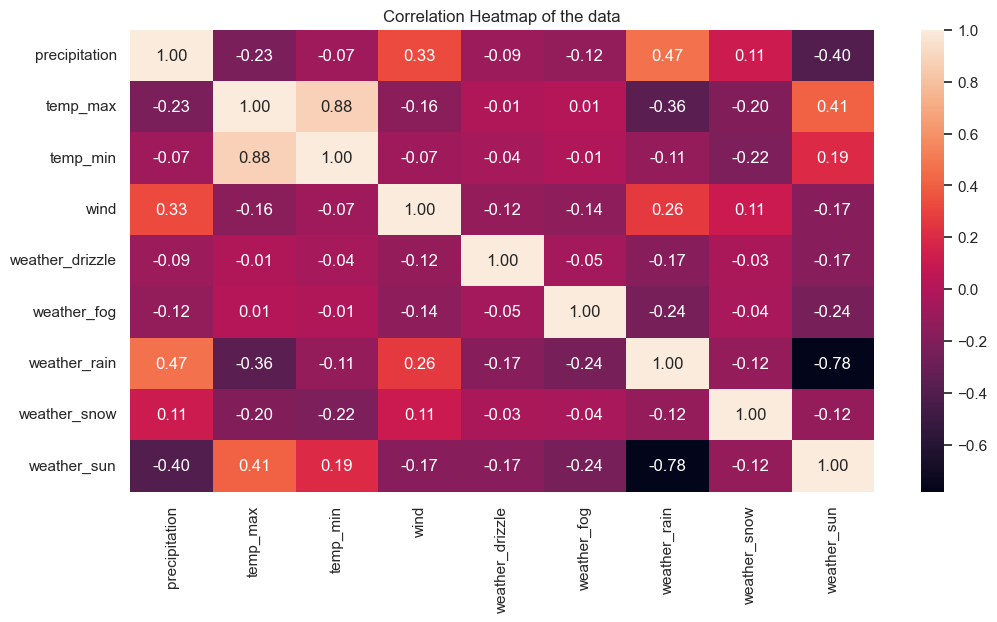

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dummies.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap of the data')
plt.show()

In [31]:
x=dummies.drop('temp_max', axis=1)
x

,precipitation,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
date,,,,,,,,
2012-01-01,0.0,5.0,4.7,1,0,0,0,0
2012-01-02,10.9,2.8,4.5,0,0,1,0,0
2012-01-03,0.8,7.2,2.3,0,0,1,0,0
2012-01-04,20.3,5.6,4.7,0,0,1,0,0
2012-01-05,1.3,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,1.7,2.9,0,0,1,0,0
2015-12-28,1.5,1.7,1.3,0,0,1,0,0
2015-12-29,0.0,0.6,2.6,0,1,0,0,0


In [32]:
y=dummies['temp_max']
y

date
2012-01-01    12.8
2012-01-02    10.6
2012-01-03    11.7
2012-01-04    12.2
2012-01-05     8.9
              ... 
2015-12-27     4.4
2015-12-28     5.0
2015-12-29     7.2
2015-12-30     5.6
2015-12-31     5.6
Name: temp_max, Length: 1461, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [34]:
model1=Ridge()

In [35]:
model1.fit(x_train, y_train)

Ridge()

In [36]:
y_predict=model1.predict(x_test)

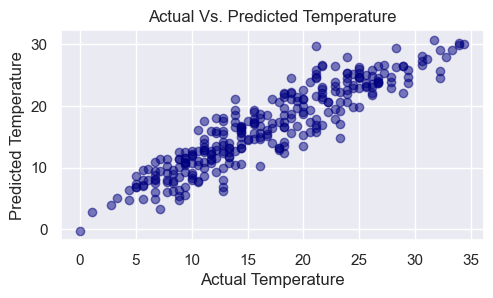

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,4)
plt.scatter(y_test, y_predict, alpha=0.5, color='navy')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual Vs. Predicted Temperature')
plt.show()

In [38]:
model1.score(x_test, y_test)*100

83.83917157975213